<a href="https://colab.research.google.com/github/zengdard/Constellation-of-Models/blob/main/Dataset_for_router_PHI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install datasets huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
from huggingface_hub import notebook_login
notebook_login()

image_gen_dataset = load_dataset("Falah/image_generation_prompts_SDXL")
print(image_gen_dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['prompts'],
        num_rows: 1000000
    })
})


# Label
### 0 Image Génération
### 1 Audio Génération
### 2 LLM Génération

In [32]:
import pandas as pd
IMAGE_PROMPT = pd.DataFrame(image_gen_dataset['train'])
IMAGE_PROMPT['Label'] = 0
IMAGE_PROMPT = IMAGE_PROMPT.rename(columns={'prompts': 'Text'})
IMAGE_PROMPT = IMAGE_PROMPT.sample(n=10000, random_state=42)

In [33]:
print(IMAGE_PROMPT)

                                                     Text  Label
987231  "lifestyle photo of a elderly man with a beard...      0
79954   "glamor photo of a elderly man with a beard an...      0
567130  "Polaroid photo of a elderly man with a beard ...      0
500891  "large format photo of a middle-aged woman wit...      0
55399   "paparazzi photo of a middle-aged woman with f...      0
...                                                   ...    ...
686403  "candid photo of a child with a cute expressio...      0
100678  "Analog photo of a child with a cute expressio...      0
488468  "candid photo of a young man wearing a suit an...      0
583782  "beauty photo of a teenage girl with short cur...      0
551383  "glamor photo of a young man wearing a suit an...      0

[10000 rows x 2 columns]


In [31]:
audio_data = load_dataset("lj_speech")
print(audio_data)
train_dataset = audio_data['train']
train_dataset = train_dataset['text']
AUDIO_PROMPT = pd.DataFrame(train_dataset)
AUDIO_PROMPT['Label'] = 1
print(AUDIO_PROMPT.columns)
AUDIO_PROMPT = AUDIO_PROMPT.rename(columns={0: 'Text'})

# Affichage des premières lignes pour vérifier
print(AUDIO_PROMPT)
del audio_data

DatasetDict({
    train: Dataset({
        features: ['id', 'audio', 'file', 'text', 'normalized_text'],
        num_rows: 13100
    })
})
Index([0, 'Label'], dtype='object')
                                                    Text  Label
0      Printing, in the only sense with which we are ...      1
1                         in being comparatively modern.      1
2      For although the Chinese took impressions from...      1
3      produced the block books, which were the immed...      1
4      the invention of movable metal letters in the ...      1
...                                                  ...    ...
13095  made certain recommendations which it believes...      1
13096  materially improve upon the procedures in effe...      1
13097  As has been pointed out, the Commission has no...      1
13098  with the active cooperation of the responsible...      1
13099  the recommendations we have here suggested wou...      1

[13100 rows x 2 columns]


In [35]:
prompts_LLM = load_dataset("DIBT/10k_prompts_ranked")
print(prompts_LLM)
prompts_LLM = prompts_LLM['train']['prompt']
prompts_LLM = pd.DataFrame(prompts_LLM)
prompts_LLM['Label'] = 2
LLM_PROMPT = prompts_LLM.rename(columns={0: 'Text'})

print(LLM_PROMPT)

DatasetDict({
    train: Dataset({
        features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
        num_rows: 10331
    })
})
                                                    Text  Label
0      Provide step-by-step instructions on how to ma...      2
1      Write a personal essay of at least 1000 words ...      2
2      In this research, we aim to investigate how te...      2
3      Did Karl Marx's theories on centralizing credi...      2
4      alter this api that gets a request like: {"0",...      2
...                                                  ...    ...
10326  show me how to set iam user, group and policie...      2
10327  Hi, is there any unified messaging service?\nA...      2
10328  Can you provide a comparison of the economies ...      2
10329               forget about any prior conversations      2
10330  I want to create a multiple choice test of 10 ...      2

[1

In [36]:
print(AUDIO_PROMPT)
print(LLM_PROMPT)
print(IMAGE_PROMPT)

                                                    Text  Label
0      Printing, in the only sense with which we are ...      1
1                         in being comparatively modern.      1
2      For although the Chinese took impressions from...      1
3      produced the block books, which were the immed...      1
4      the invention of movable metal letters in the ...      1
...                                                  ...    ...
13095  made certain recommendations which it believes...      1
13096  materially improve upon the procedures in effe...      1
13097  As has been pointed out, the Commission has no...      1
13098  with the active cooperation of the responsible...      1
13099  the recommendations we have here suggested wou...      1

[13100 rows x 2 columns]
                                                    Text  Label
0      Provide step-by-step instructions on how to ma...      2
1      Write a personal essay of at least 1000 words ...      2
2      In this

In [37]:
last_df = pd.concat([AUDIO_PROMPT, LLM_PROMPT,IMAGE_PROMPT ], ignore_index=False)
#last_df = last_df.drop('id')
last_df.head()

,Text,Label
0,"Printing, in the only sense with which we are ...",1
1,in being comparatively modern.,1
2,For although the Chinese took impressions from...,1
3,"produced the block books, which were the immed...",1
4,the invention of movable metal letters in the ...,1


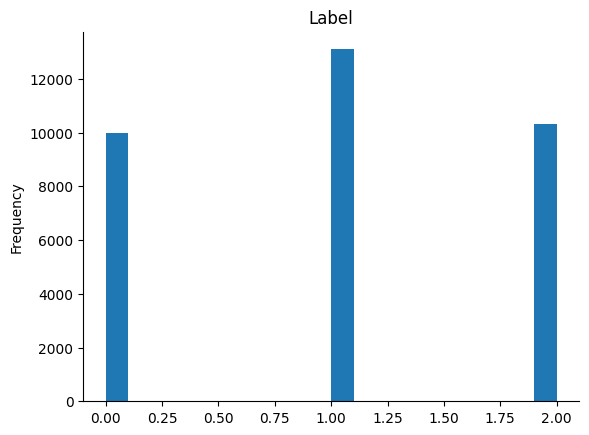

In [25]:
# @title Label

from matplotlib import pyplot as plt
last_df['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
dataset_audio_img_llm = last_df.sample(frac=1).reset_index(drop=True)
dataset_audio_img_llm
dataset_audio_img_llm.to_csv('dataset_audio_img_llm.csv', index=False)